# Question 1


In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

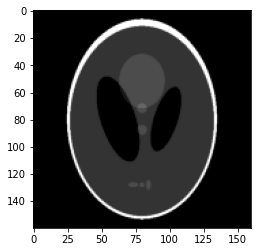

In [ ]:

from sklearn.datasets import load_sample_images
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale

image = shepp_logan_phantom()
image = rescale(image, scale=0.4, mode='reflect')
plt.imshow(image,cmap="gray")


In [ ]:
#Creating a circular mask
np.ogrid[:4,:5]

[array([[0],
        [1],
        [2],
        [3]]), array([[0, 1, 2, 3, 4]])]

In [ ]:
# creating a circular mask

def create_circular_mask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

In [ ]:
h, w = image.shape[:6]
mask = create_circular_mask(h, w)
masked_img = image.copy()
masked_img[~mask] = 0

In [ ]:
center = (int(w/4), int(h/4))
mask = create_circular_mask(h, w, center=center)

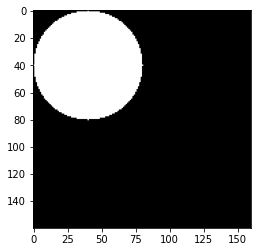

In [ ]:
maskimg = plt.imshow(mask,cmap="gray")
plt.show()

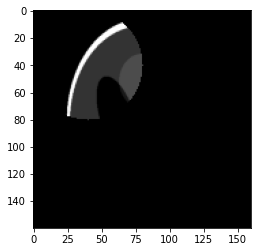

In [ ]:
#circular mask on image

z_masked = np.multiply(image,mask)

zimg_masked = plt.imshow(z_masked,cmap="gray")
plt.show()

# Question 1 last part and Question 5

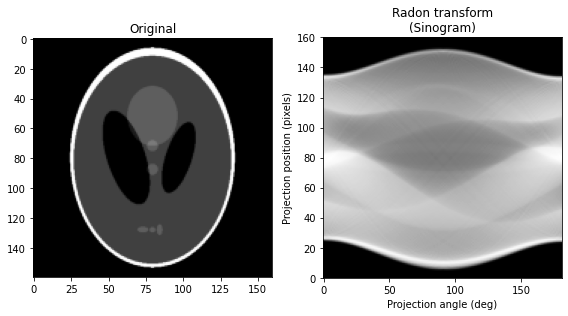

In [ ]:
#Forward transform - Radon transform - enter projection angle

import numpy as np
import matplotlib.pyplot as plt

from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale

image = shepp_logan_phantom()
image = rescale(image, scale=0.4, mode='reflect')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(image, cmap=plt.cm.Greys_r)

theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta)
dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')

fig.tight_layout()
plt.show()

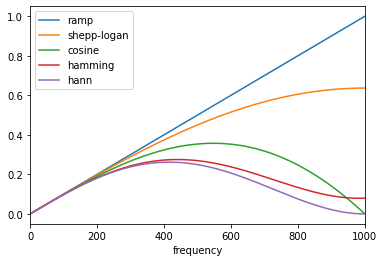

In [ ]:
#Reconstruction using backprojection

import matplotlib.pyplot as plt
from skimage.transform.radon_transform import _get_fourier_filter

filters = ['ramp', 'shepp-logan', 'cosine', 'hamming', 'hann']

for ix, f in enumerate(filters):
    response = _get_fourier_filter(2000, f)
    plt.plot(response, label=f)

plt.xlim([0, 1000])
plt.xlabel('frequency')
plt.legend()
plt.show()

FBP rms reconstruction error: 0.0283


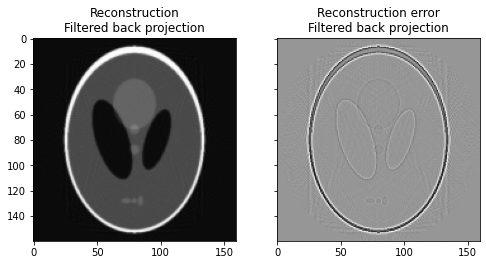

In [ ]:
#Applying inverse radon transform using 'ramp' filter

from skimage.transform import iradon

reconstruction_fbp = iradon(sinogram, theta=theta, filter_name='ramp')
error = reconstruction_fbp - image
print(f'FBP rms reconstruction error: {np.sqrt(np.mean(error**2)):.3g}')

imkwargs = dict(vmin=-0.2, vmax=0.2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5),
                               sharex=True, sharey=True)
ax1.set_title("Reconstruction\nFiltered back projection")
ax1.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)
ax2.set_title("Reconstruction error\nFiltered back projection")
ax2.imshow(reconstruction_fbp - image, cmap=plt.cm.Greys_r, **imkwargs)
plt.show()


# Question 2


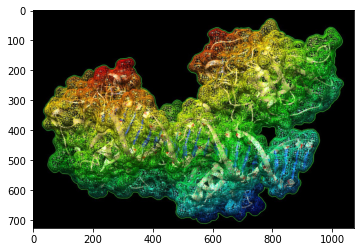

In [ ]:
#PDB file downloaded for p53 protein and volume image downloaded using UCSF Chimera

from PIL import Image
img_3d = Image.open("/content/drive/MyDrive/p53.png").convert('RGB')
plt.imshow(img_3d)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
img_3d.size
img_3d = np.asarray(img_3d)

TypeError: ignored

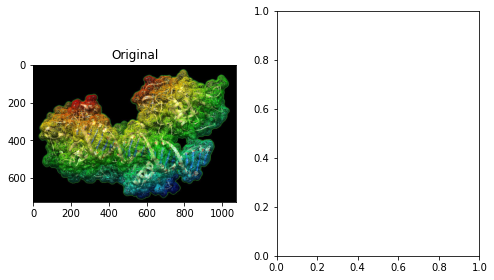

In [14]:
#Forward transform - Radon transform - enter projection angle

import numpy as np
import matplotlib.pyplot as plt

#from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale


#img_3d = rescale(img_3d, scale=0.4, mode='reflect')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(img_3d, cmap=plt.cm.Greys_r)

theta = np.linspace(0., 180., max(img_3d.size), endpoint=False)
sinogram = radon(img_3d, theta=theta)
dx, dy = 0.5 * 180.0 / max(img_3d.size), 0.5 / sinogram.shape[0]
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')

fig.tight_layout()
plt.show()

In [ ]:
#Reconstruction using backprojection

import matplotlib.pyplot as plt
from skimage.transform.radon_transform import _get_fourier_filter

filters = ['ramp', 'shepp-logan', 'cosine', 'hamming', 'hann']

for ix, f in enumerate(filters):
    response = _get_fourier_filter(2000, f)
    plt.plot(response, label=f)

plt.xlim([0, 1000])
plt.xlabel('frequency')
plt.legend()
plt.show()

#Applying inverse radon transform using 'ramp' filter

from skimage.transform import iradon

reconstruction_fbp = iradon(sinogram, theta=theta, filter_name='ramp')
error = reconstruction_fbp - img_3d
print(f'FBP rms reconstruction error: {np.sqrt(np.mean(error**2)):.3g}')

imkwargs = dict(vmin=-0.2, vmax=0.2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5),
                               sharex=True, sharey=True)
ax1.set_title("Reconstruction\nFiltered back projection")
ax1.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)
ax2.set_title("Reconstruction error\nFiltered back projection")
ax2.imshow(reconstruction_fbp - img_3d, cmap=plt.cm.Greys_r, **imkwargs)
plt.show()
